Rudraksh Singh E22CSEU0010 LAB 8

Task1

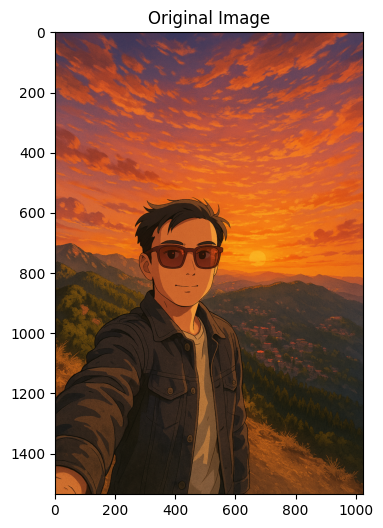

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/ChatGPT Image Mar 29, 2025, 08_11_55 PM.png"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

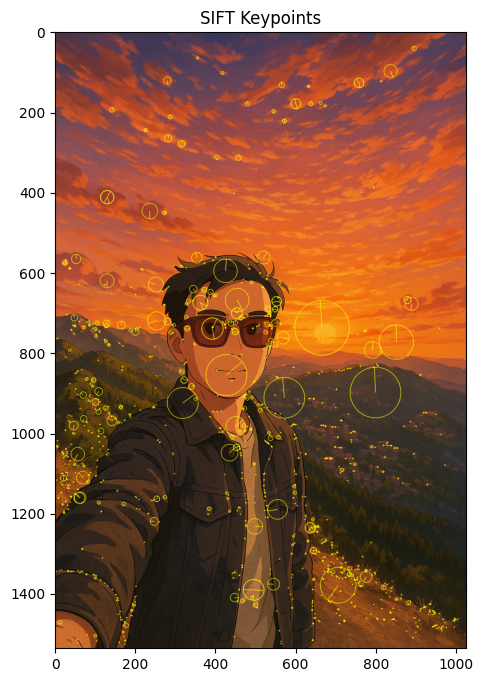

In [ ]:
# SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)
sift_img = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.show()

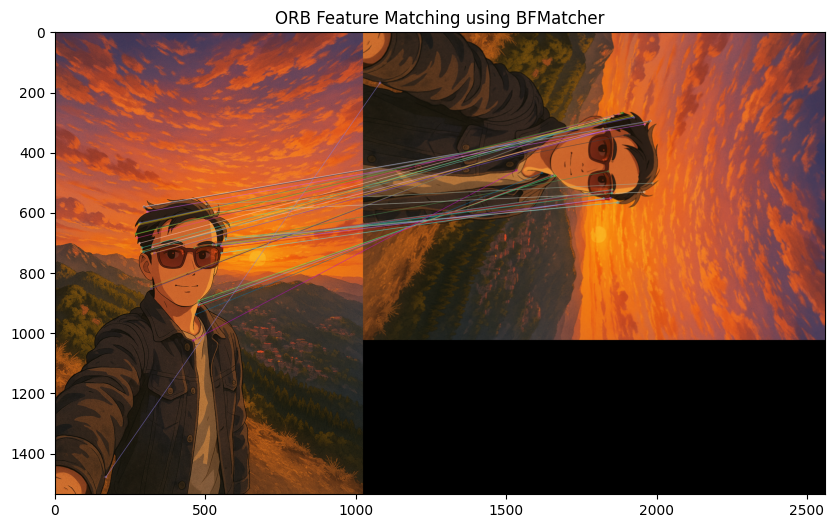

In [ ]:
# ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray, None)

# second image - rotating and blurring the original
img2 = cv2.GaussianBlur(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE), (5,5), 0)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

match_img = cv2.drawMatches(img, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) # Feature Matching

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title("ORB Feature Matching using BFMatcher")
plt.show()

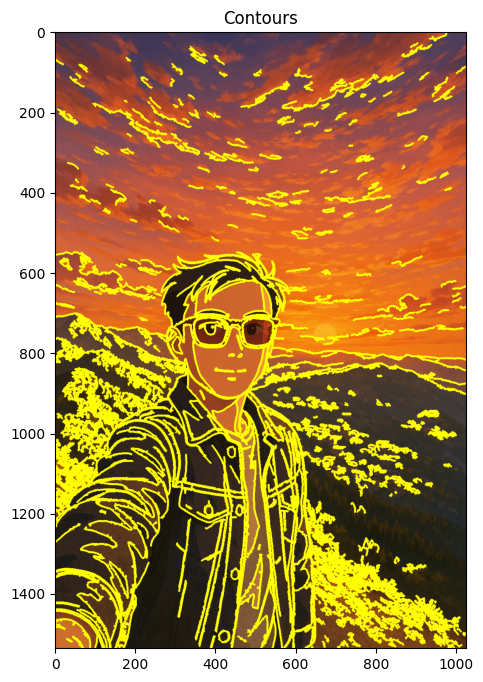

In [ ]:
edges = cv2.Canny(gray, 50, 150) # Canny Edge Detection
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Contours
contour_img = img.copy() # Draw contour
cv2.drawContours(contour_img, contours, -1, (0, 255, 255), 3)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.show()

Task 2.1 Resnet 18 & 34

In [ ]:
!pip install deeplake
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 95.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [ ]:
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 169M/169M [00:13<00:00, 12.9MB/s]


In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet34 = torchvision.models.resnet34(pretrained=True)

num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 100)

num_ftrs = resnet34.fc.in_features
resnet34.fc = nn.Linear(num_ftrs, 100)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet18 = resnet18.to(device)
resnet34 = resnet34.to(device)

#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer18 = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)
optimizer34 = optim.SGD(resnet34.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 206MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

In [ ]:
def train_model(model, optimizer, num_epochs=25):
    train_loss = []
    train_acc = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        start_time = time.time()

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total

        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)

        print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

    return train_loss, train_acc

# ResNet-18
train_loss18, train_acc18 = train_model(resnet18, optimizer18)

# ResNet-34
train_loss34, train_acc34 = train_model(resnet34, optimizer34)

Epoch 1/25 - Loss: 0.0873, Accuracy: 97.71%
Epoch 2/25 - Loss: 0.0843, Accuracy: 97.73%
Epoch 3/25 - Loss: 0.0810, Accuracy: 97.77%
Epoch 4/25 - Loss: 0.0729, Accuracy: 98.10%
Epoch 5/25 - Loss: 0.0725, Accuracy: 97.96%
Epoch 6/25 - Loss: 0.0637, Accuracy: 98.30%
Epoch 7/25 - Loss: 0.0511, Accuracy: 98.69%
Epoch 8/25 - Loss: 0.0465, Accuracy: 98.85%
Epoch 9/25 - Loss: 0.0458, Accuracy: 98.89%
Epoch 10/25 - Loss: 0.0433, Accuracy: 98.92%
Epoch 11/25 - Loss: 0.0408, Accuracy: 99.01%
Epoch 12/25 - Loss: 0.0416, Accuracy: 98.92%
Epoch 13/25 - Loss: 0.0426, Accuracy: 98.86%
Epoch 14/25 - Loss: 0.0533, Accuracy: 98.58%
Epoch 15/25 - Loss: 0.0439, Accuracy: 98.84%
Epoch 16/25 - Loss: 0.0392, Accuracy: 98.97%
Epoch 17/25 - Loss: 0.0348, Accuracy: 99.11%
Epoch 18/25 - Loss: 0.0355, Accuracy: 99.07%
Epoch 19/25 - Loss: 0.0340, Accuracy: 99.10%
Epoch 20/25 - Loss: 0.0298, Accuracy: 99.25%
Epoch 21/25 - Loss: 0.0338, Accuracy: 99.08%
Epoch 22/25 - Loss: 0.0286, Accuracy: 99.27%
Epoch 23/25 - Loss:

In [ ]:
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

# Evaluate ResNet-18
accuracy18 = evaluate_model(resnet18)

# Evaluate ResNet-34
accuracy34 = evaluate_model(resnet34)

Accuracy: 55.91%
Accuracy: 56.96%


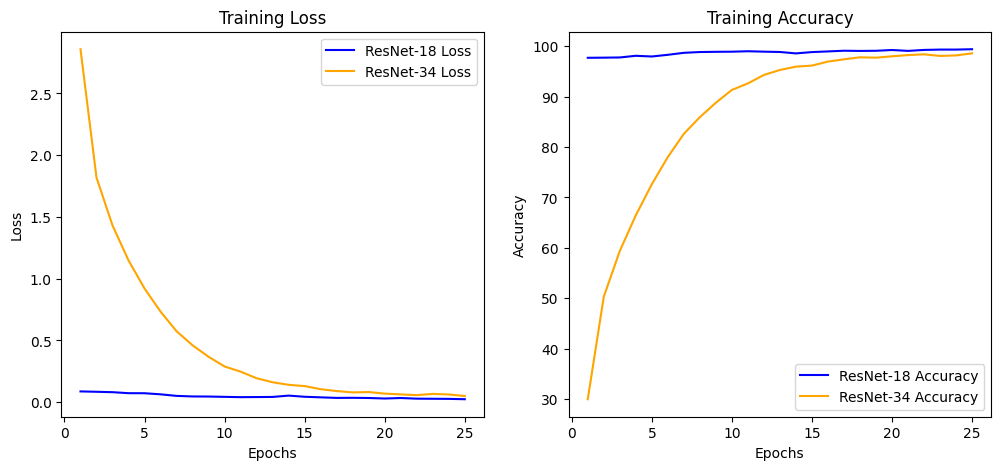

In [ ]:
def plot_training_curves(loss18, acc18, loss34, acc34):
    epochs = range(1, len(loss18) + 1)

    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss18, label='ResNet-18 Loss', color='blue')
    plt.plot(epochs, loss34, label='ResNet-34 Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc18, label='ResNet-18 Accuracy', color='blue')
    plt.plot(epochs, acc34, label='ResNet-34 Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training Accuracy')

    plt.show()

plot_training_curves(train_loss18, train_acc18, train_loss34, train_acc34)

In [ ]:
print(f"ResNet-18 Accuracy: {accuracy18:.2f}%")
print(f"ResNet-34 Accuracy: {accuracy34:.2f}%")

# Inference time comparison
def time_inference(model):
    start_time = time.time()
    with torch.no_grad():
        for data in testloader:
            inputs, _ = data
            inputs = inputs.to(device)
            model(inputs)
    inference_time = time.time() - start_time
    print(f"Inference time: {inference_time:.4f} seconds")
    return inference_time

# Compare
inference_time18 = time_inference(resnet18)
inference_time34 = time_inference(resnet34)

print(f"ResNet-18 Inference Time: {inference_time18:.4f} seconds")
print(f"ResNet-34 Inference Time: {inference_time34:.4f} seconds")

ResNet-18 Accuracy: 55.91%
ResNet-34 Accuracy: 56.96%
Inference time: 2.6737 seconds
Inference time: 3.6649 seconds
ResNet-18 Inference Time: 2.6737 seconds
ResNet-34 Inference Time: 3.6649 seconds


Task 2.2 Meta Learning

In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random
from PIL import Image
from torchvision.transforms import ElasticTransform
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Elastic Deformation + Normalization
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.ElasticTransform(alpha=50.0, sigma=5.0),
])

transform_test = transforms.ToTensor()

mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform_train)
mnist_test = datasets.MNIST(root="./data", train=False, download=True, transform=transform_test)

train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
train_set, val_set = torch.utils.data.random_split(mnist_train, [train_size, val_size])

In [8]:
class FewShotDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.labels = np.array([label for _, label in dataset])
        self.class_to_indices = {c: np.where(self.labels == c)[0] for c in np.unique(self.labels)}

    def sample_episode(self, n_way=5, k_shot=1, q_query=15):
        selected_classes = np.random.choice(list(self.class_to_indices.keys()), n_way, replace=False)
        support_images, query_images, support_labels, query_labels = [], [], [], []

        for i, c in enumerate(selected_classes):
            idxs = np.random.choice(self.class_to_indices[c], k_shot + q_query, replace=False)
            support_idxs = idxs[:k_shot]
            query_idxs = idxs[k_shot:]

            support_images.extend([self.dataset[j][0] for j in support_idxs])
            query_images.extend([self.dataset[j][0] for j in query_idxs])
            support_labels.extend([i] * k_shot)
            query_labels.extend([i] * q_query)

        return (torch.stack(support_images), torch.tensor(support_labels),
                torch.stack(query_images), torch.tensor(query_labels))

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class ConvEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten()
        )

    def forward(self, x):
        return self.net(x)

def proto_loss(support, support_labels, query, query_labels, model):
    embeddings = model(torch.cat([support, query]))
    support_embed = embeddings[:len(support)]
    query_embed = embeddings[len(support):]

    prototypes = []
    for c in torch.unique(support_labels):
        prototypes.append(support_embed[support_labels == c].mean(0))
    prototypes = torch.stack(prototypes)

    dists = torch.cdist(query_embed, prototypes)
    loss = F.cross_entropy(-dists, query_labels)
    preds = dists.argmin(dim=1)
    acc = (preds == query_labels).float().mean().item()
    return loss, acc


In [10]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = ConvEncoder()

    def forward_once(self, x):
        return self.encoder(x)

    def forward(self, x1, x2):
        return F.pairwise_distance(self.forward_once(x1), self.forward_once(x2))

def contrastive_loss(out1, out2, label, margin=1.0):
    dist = F.pairwise_distance(out1, out2)
    loss = (1 - label) * dist.pow(2) + label * F.relu(margin - dist).pow(2)
    return loss.mean()

In [11]:
class MatchingNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = ConvEncoder()

    def forward(self, support, query):
        support_embed = self.encoder(support)
        query_embed = self.encoder(query)

        similarities = F.cosine_similarity(query_embed.unsqueeze(1), support_embed.unsqueeze(0), dim=2)
        softmax_sim = F.softmax(similarities, dim=1)

        support_labels = torch.arange(support.size(0)).to(device)
        preds = softmax_sim @ F.one_hot(support_labels, num_classes=support.size(0)).float()
        return preds

In [12]:
proto_model = ConvEncoder().to(device)
optimizer = torch.optim.Adam(proto_model.parameters(), lr=1e-3)
fewshot = FewShotDataset(train_set)

for episode in range(300):
    s_img, s_lbl, q_img, q_lbl = fewshot.sample_episode()
    s_img, s_lbl = s_img.to(device), s_lbl.to(device)
    q_img, q_lbl = q_img.to(device), q_lbl.to(device)

    loss, acc = proto_loss(s_img, s_lbl, q_img, q_lbl, proto_model)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if episode % 50 == 0:
        print(f"[{episode}] Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

[0] Loss: 1.4285, Accuracy: 0.5600
[50] Loss: 1.0649, Accuracy: 0.5333
[100] Loss: 0.8683, Accuracy: 0.6533
[150] Loss: 0.7252, Accuracy: 0.7733
[200] Loss: 0.7918, Accuracy: 0.7333
[250] Loss: 0.7558, Accuracy: 0.6933


In [13]:
from sklearn.metrics import classification_report

# evaluation episode
s_img, s_lbl, q_img, q_lbl = fewshot.sample_episode()
s_img, s_lbl = s_img.to(device), s_lbl.to(device)
q_img, q_lbl = q_img.to(device), q_lbl.to(device)

with torch.no_grad():
    emb_all = proto_model(torch.cat([s_img, q_img]))
    proto = torch.stack([emb_all[:5][s_lbl == i].mean(0) for i in range(5)])
    dists = torch.cdist(emb_all[5:], proto)
    preds = dists.argmin(1).cpu()
    print(classification_report(q_lbl.cpu(), preds))


              precision    recall  f1-score   support

           0       0.65      0.87      0.74        15
           1       0.67      0.40      0.50        15
           2       1.00      0.20      0.33        15
           3       0.42      0.67      0.51        15
           4       0.53      0.67      0.59        15

    accuracy                           0.56        75
   macro avg       0.65      0.56      0.54        75
weighted avg       0.65      0.56      0.54        75

